# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader//Machine_Learning-USU/blob/main/Lectures%20and%20codes/Module%2010-%20Bagging%20and%20Boosting/Python/bagging/RF_classification_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Random Forest Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state= 1000

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/credit_card_clean.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Exploring the variables:

1. __ID__ : ID of each client 

2. __LIMIT_BAL__: Amount of given credit in NT dollars (includes individual and family/supplementary credit) 


3. __SEX__: Gender (1=male, 2=female)

4. __EDUCATION__: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

5. __MARRIAGE__: Marital status (1=married, 2=single, 3=others)

6. __AGE__: Age in years

7. __PAY_1__: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

8. __PAY_2__: Repayment status in August, 2005 (scale same as above)

9. __PAY_3__: Repayment status in July, 2005 (scale same as above)

10. __PAY_4__: Repayment status in June, 2005 (scale same as above)

11. __PAY_5__: Repayment status in May, 2005 (scale same as above)

12. __PAY_6__: Repayment status in April, 2005 (scale same as above)

13. __BILL_AMT1__: Amount of bill statement in September, 2005 (NT dollar)

14. __BILL_AMT2__: Amount of bill statement in August, 2005 (NT dollar)

15. __BILL_AMT3__: Amount of bill statement in July, 2005 (NT dollar)

16. __BILL_AMT4__: Amount of bill statement in June, 2005 (NT dollar)

17. __BILL_AMT5__: Amount of bill statement in May, 2005 (NT dollar)

18. __BILL_AMT6__: Amount of bill statement in April, 2005 (NT dollar)

19. __PAY_AMT1__: Amount of previous payment in September, 2005 (NT dollar)

20. __PAY_AMT2__: Amount of previous payment in August, 2005 (NT dollar)

21. __PAY_AMT3__: Amount of previous payment in July, 2005 (NT dollar)

22. __PAY_AMT4__: Amount of previous payment in June, 2005 (NT dollar)

23. __PAY_AMT5__: Amount of previous payment in May, 2005 (NT dollar)

24. __PAY_AMT6__: Amount of previous payment in April, 2005 (NT dollar)

25. __default.payment.next.month__: Default payment (1=yes, 0=no)


*Note: NT is Taiwain Dollars*





In [5]:
df.isnull().sum()/len(df)

ID           0.0
LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
DEFAULT      0.0
dtype: float64

Looks good!
Now let's see if there are any duplicates!

In [6]:
sum(df.duplicated())

0

In [7]:
# dropping the duplicates:
df.drop_duplicates(inplace=True)

In [8]:
df.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        4
MARRIAGE         3
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
DEFAULT          2
dtype: int64

---

## Label Encoding categorical features as an integer array.

In random forest we don't need to transfer the categorical variables into dummy variables (using one-hot-encoding). However, the algorithm is not able to handel strings. We should transform strings into quantitative variables. 

It seems that **EDUCATION** is ordinal categotical and **SEX, MARRIAGE** are categorical variables and should be transformed into numerics. Typically, we use onehot encoder for sex and marriage but here for random forest, it is Okay to use ordinal encoder. 


In [9]:
ordinal_categoricals = ['EDUCATION']
labeled_categoricals = ['SEX', 'MARRIAGE']
categoricals         = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [10]:
# starting with ordinal categorical variables:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

ordinal_mappings = {}
for col in ordinal_categoricals:
    df[col] = oe.fit_transform(df[[col]])
    ordinal_mappings[col] = oe.categories_

ordinal_mappings

{'EDUCATION': [array(['grad', 'highschool', 'other', 'university'], dtype=object)]}

In [11]:
# now let's get into the labeled categorical variables:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

labeled_mappings = {}
for col in labeled_categoricals:
    df[col] = le.fit_transform(df[col])
    labeled_mappings[col] = le.classes_

labeled_mappings

{'SEX': array(['female', 'male'], dtype=object),
 'MARRIAGE': array(['married', 'other', 'single'], dtype=object)}

In [12]:
# finally let's set the type of the categorical variables to category:
all_categoricals = ordinal_categoricals + labeled_categoricals + categoricals
all_categoricals

['EDUCATION',
 'SEX',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [13]:

df[all_categoricals] = df[all_categoricals].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  float64 
 2   SEX        30000 non-null  category
 3   EDUCATION  30000 non-null  category
 4   MARRIAGE   30000 non-null  category
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  category
 7   PAY_2      30000 non-null  category
 8   PAY_3      30000 non-null  category
 9   PAY_4      30000 non-null  category
 10  PAY_5      30000 non-null  category
 11  PAY_6      30000 non-null  category
 12  BILL_AMT1  30000 non-null  float64 
 13  BILL_AMT2  30000 non-null  float64 
 14  BILL_AMT3  30000 non-null  float64 
 15  BILL_AMT4  30000 non-null  float64 
 16  BILL_AMT5  30000 non-null  float64 
 17  BILL_AMT6  30000 non-null  float64 
 18  PAY_AMT1   30000 non-null  float64 
 19  PAY_AMT2   30000 non-null

In [14]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,0,3.0,0,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0,3.0,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,3.0,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,3.0,0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,3.0,0,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
df.shape

(30000, 25)

Remember, with other machine learning models, we ended up with **78 features** using the same data set because we had to transform categorical variables into dummies. But with RF, there is only **23 features** to work with. 

In [16]:
df_dummy = pd.get_dummies(df, drop_first=True, dtype=int)
df_dummy.shape

(30000, 80)

### Scaling features
In random forest, we don't need to scale the features!! 

In [17]:
# first we look at target variable proportions:
pd.crosstab(df['DEFAULT'],df['DEFAULT'], normalize='all')*100

DEFAULT,0,1
DEFAULT,,
0,77.88,0.00
1,0.00,22.12


### Defining the variables and splitting the data

In [18]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [19]:
y = df['DEFAULT']
X = df.drop(['DEFAULT','ID'], axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

---

## Random Forest Classification with Sklearn

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Fitting RF classifier to the Training set

RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
# Predicting the Test set probabilities and classes
y_hat      = RF_classifier.predict(X_test)
y_hat_probs = RF_classifier.predict_proba(X_test)[:,1] 
# predicted probabilities are reported for both classes. we saved the prob of purchased!

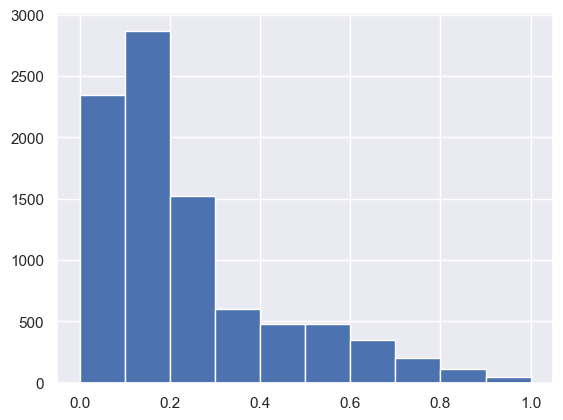

In [23]:
plt.hist(y_hat_probs)
plt.show()

In [24]:
y_hat

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

---
## Evaluating the model performance on test data

In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#### Confusion matrix

In [26]:
print(confusion_matrix(y_test, y_hat))

[[6613  398]
 [1245  744]]


#### Built-in classification report

In [27]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7011
           1       0.65      0.37      0.48      1989

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



---------------

## Tuning hyperparameters: 

The key configuration parameters include the various hyperparameters for the individual decision trees introduced in the decision tree notebook. 

The following tables lists additional options for the two `RandomForest` classes:


| Keyword      | Default | Description                                                                                                                |
|--------------|---------|----------------------------------------------------------------------------------------------------------------------------|
| bootstrap    | True    | Bootstrap samples during training                                                                                          |
| n_estimators | 10      | # trees in the forest.                                                                                                     |
| oob_score    | False   | Use out-of-bag samples to estimate the R2 on unseen data                                                                   |
| max_features | auto    | The number of features to consider when looking for the best split                                                         |


- The `bootstrap` parameter activates in the preceding bagging algorithm outline, which in turn enables the computation of the out-of-bag score (oob_score) that estimates the generalization accuracy using samples not included in the bootstrap sample used to train a given tree (see next section for detail). 
- The `n_estimators` parameter defines the number of trees to be grown as part of the forest. Larger forests perform better, but also take more time to build. It is important to monitor the cross-validation error as a function of the number of base learners to identify when the marginal reduction of the prediction error declines and the cost of additional training begins to outweigh the benefits.
- The `max_features` parameter controls the size of the randomly selected feature subsets available when learning a new decision rule and split a node. A lower value reduces the correlation of the trees and, thus, the ensemble's variance, but may also increase the bias. Good starting values are `n_features` (the number of training features) for regression problems and `sqrt(n_features)` for classification problems, but will depend on the relationships among features and should be optimized using cross-validation.

Random forests are designed to contain deep fully-grown trees, which can be created using `max_depth=None` and `min_samples_split=2`. However, these values are not necessarily optimal, especially for high-dimensional data with many samples and, consequently, potentially very deep trees that can become very computationally-, and memory-, intensive.

The `RandomForest` class provided by sklearn support parallel training and prediction by setting the n_jobs parameter to the k number of jobs to run on different cores. The -1 value uses all available cores. The overhead of interprocess communication may limit the speedup from being linear so that k jobs may take more than 1/k the time of a single job. Nonetheless, the speedup is often quite significant for large forests or deep individual trees that may take a meaningful amount of time to train when the data is large, and split evaluation becomes costly.

As always, the best parameter configuration should be identified using cross-validation. The following steps illustrate the process:


### Gridsearch

In [28]:
my_param_grid = {'n_estimators':[100,500], 'criterion':['entropy','gini'],
                 'max_features':['log2'], 'max_depth':[10]}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [31]:
# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   1.9s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   1.9s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   1.9s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   1.9s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   1.9s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=500; total time=   9.7s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=500; total time=   9.8s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=500; total time=   9.8s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=500; total time=   9.8s
[CV] END criterion=entropy, max_depth=10, max_features=log

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1000),
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [10],
                         'max_features': ['log2'], 'n_estimators': [100, 500]},
             verbose=2)

In [32]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 500}

In [33]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=500, random_state=1000)

In [34]:
y_hat_optimized = grid.predict(X_test)

#### Confusion matrix

In [35]:
print(confusion_matrix(y_test, y_hat_optimized))

[[6668  343]
 [1249  740]]


#### Built-in classification report

In [36]:
print(classification_report(y_test, y_hat_optimized))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7011
           1       0.68      0.37      0.48      1989

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.82      0.80      9000



## Exercise:
1. Use cross validation to estimate the accuracy in the test set.
2. Use OOB observations to estimate the accuracy in the test set.

---

## Dealing with imbalanced target variables!

In [37]:
pd.crosstab(df['DEFAULT'],df['DEFAULT'], normalize='all')*100

DEFAULT,0,1
DEFAULT,,
0,77.88,0.00
1,0.00,22.12


The **balanced** mode in scikit-learn's RandomForestClassifier class adjusts the weights of the training data samples inversely proportional to their class frequencies. This means that samples from minority classes will be given more weight than samples from majority classes. This helps to ensure that the model learns from all of the classes in the training data, even if the classes are imbalanced.

The **balanced_subsample** mode in scikit-learn's RandomForestClassifier class is similar to the balanced mode, but it calculates the weights based on the bootstrap sample for each tree grown. This means that the weights of the training data samples will vary from tree to tree.

$$weight = n_{samples} / (n_{classes} * np.bincount(y))$$ 

In general, the balanced mode is a good choice for most imbalanced classification problems. However, if the training data is very imbalanced, the balanced_subsample mode may be a better choice. This is because the balanced_subsample mode can help to reduce the variance of the model.

You can also try both modes to see which one performs better on your specific dataset.

In [38]:
y= df['DEFAULT']
np.bincount(y)

array([23364,  6636], dtype=int64)

In [39]:
n_samples = y.shape[0]  
n_samples

30000

In [40]:
balanced_weights = n_samples / (np.bincount(y))
balanced_weights

array([1.28402671, 4.52079566])

In [41]:
# Normalize the weights
balanced_weights = balanced_weights / np.sum(balanced_weights)
balanced_weights

array([0.2212, 0.7788])

Training a balanced RF:

In [42]:
RF_balanced = RandomForestClassifier(random_state=1000, criterion='entropy', max_features='log2', max_depth=10, class_weight='balanced')

In [43]:
y_hat_balanced = RF_balanced.fit(X_train, y_train).predict(X_test)

#### Confusion matrix

In [44]:
print(confusion_matrix(y_test, y_hat_balanced))

[[5972 1039]
 [ 836 1153]]


#### Built-in classification report

In [45]:
print(classification_report(y_test, y_hat_balanced))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7011
           1       0.53      0.58      0.55      1989

    accuracy                           0.79      9000
   macro avg       0.70      0.72      0.71      9000
weighted avg       0.80      0.79      0.80      9000



### ROC and AUC 

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

No Skill     : ROC AUC=0.500
Random Forest: ROC AUC=0.788


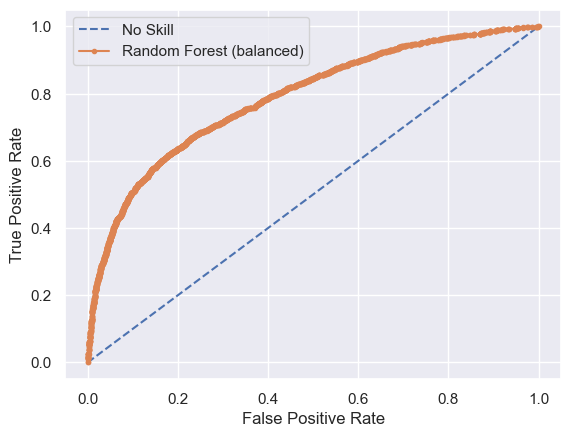

In [47]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = RF_balanced.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill     : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest (balanced)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Based on **AUC=0.789**, the model is doing a better job compared to random prediction.

Recall: the best we could do with Logistic regression was **AUC=0.66**

----------------

## Feature Importance

In [48]:
RF_balanced.feature_importances_

array([0.04461753, 0.00433285, 0.00718974, 0.00412961, 0.02624886,
       0.22518594, 0.0947661 , 0.06573747, 0.04028006, 0.03343539,
       0.02995901, 0.04574314, 0.03682791, 0.03294904, 0.02984103,
       0.02868225, 0.02931651, 0.04836945, 0.03886787, 0.03801253,
       0.03371075, 0.03073862, 0.03105833])

In [49]:
RF_balanced.feature_names_in_

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'], dtype=object)

In [50]:
feature_importance_df = pd.DataFrame({'Features': RF_balanced.feature_names_in_ , 'Feature_importance':RF_balanced.feature_importances_}).sort_values(by=['Feature_importance'])
feature_importance_df

,Features,Feature_importance
3,MARRIAGE,0.004130
1,SEX,0.004333
2,EDUCATION,0.007190
4,AGE,0.026249
15,BILL_AMT5,0.028682
16,BILL_AMT6,0.029317
14,BILL_AMT4,0.029841
10,PAY_6,0.029959
21,PAY_AMT5,0.030739
22,PAY_AMT6,0.031058


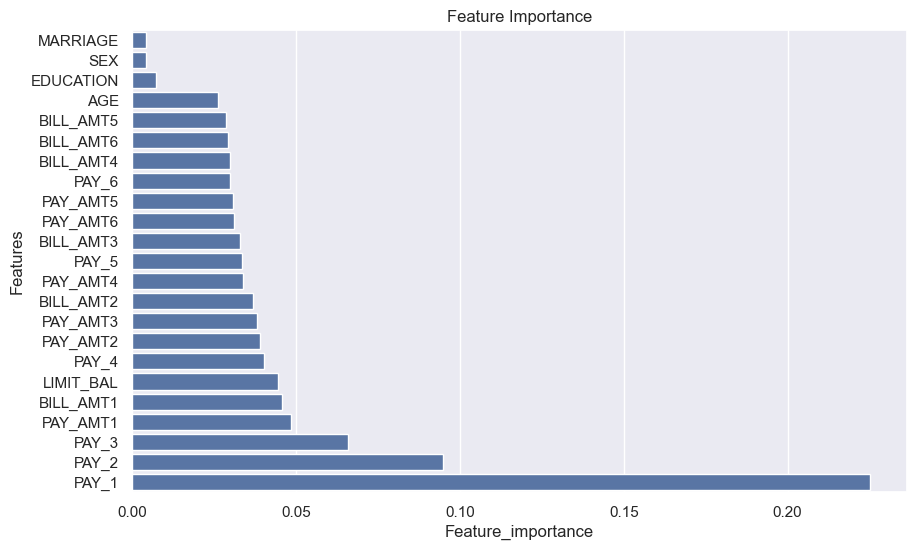

In [51]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=feature_importance_df)
plt.show()

Recall:
- PAY_1: repayment status in the past 1 month (paid in full, paid minimum due, delay for # months)
- PAY_2: repayment status in the past 2 months
- .... 
- BILL_AMT: amount of bill statement


---
---
# PyCaret

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [ ]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

# !pip install pycaret

In [52]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.3.2'

In [53]:
df_py = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/credit_card_clean.csv')

In [54]:
df_py.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [55]:
from pycaret.classification import *


In [56]:
setup(data=df_py,  target='DEFAULT',ignore_features=['ID'] , session_id=555, train_size=0.7, preprocess=True)


,Description,Value
0,Session id,555
1,Target,DEFAULT
2,Target type,Binary
3,Original data shape,"(30000, 25)"
4,Transformed data shape,"(30000, 29)"
5,Transformed train set shape,"(21000, 29)"
6,Transformed test set shape,"(9000, 29)"
7,Ignore features,1
8,Numeric features,20
9,Categorical features,3


In [57]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Create and tune model

In [58]:
rf = create_model(estimator='rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8186,0.7827,0.3815,0.6531,0.4816,0.3807,0.4010
1,0.8114,0.7607,0.3685,0.6241,0.4634,0.3581,0.3764
2,0.8033,0.7456,0.3233,0.6024,0.4208,0.3151,0.3372
3,0.8290,0.7674,0.3815,0.7108,0.4965,0.4046,0.4331
4,0.8105,0.7710,0.3772,0.6162,0.4679,0.3606,0.3767
5,0.8148,0.7551,0.3720,0.6407,0.4707,0.3679,0.3879
6,0.8157,0.7604,0.3806,0.6413,0.4777,0.3746,0.3934
7,0.8105,0.7667,0.3591,0.6255,0.4563,0.3515,0.3714
8,0.8105,0.7464,0.3376,0.6356,0.4410,0.3395,0.3642


In [59]:
tuned_rf = tune_model(rf, fold=5)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8055,0.7706,0.2411,0.6667,0.3542,0.2682,0.3165
1,0.8100,0.7626,0.2443,0.7028,0.3626,0.2805,0.3349
2,0.8098,0.7712,0.2734,0.6720,0.3887,0.2990,0.3415
3,0.8140,0.7776,0.2809,0.6979,0.4006,0.3134,0.3591
4,0.8086,0.7638,0.2476,0.6866,0.3639,0.2794,0.3301
Mean,0.8096,0.7692,0.2575,0.6852,0.3740,0.2881,0.3364
Std,0.0028,0.0054,0.0164,0.0141,0.0176,0.0161,0.0140


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Plot Model


In [60]:
plot_model(tuned_rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


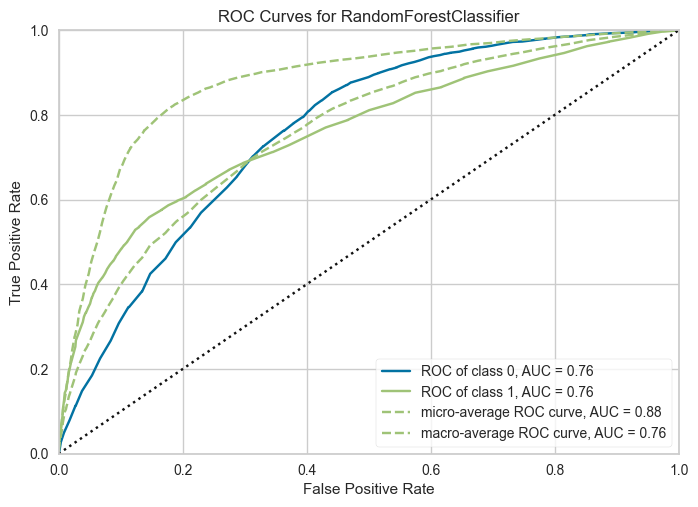

In [61]:
plot_model(tuned_rf, plot = 'auc')

the macro-average ROC curve calculates the TPR and FPR separately for each class, and then averages these values across all classes. Micro-average however, is the weighted average version! 

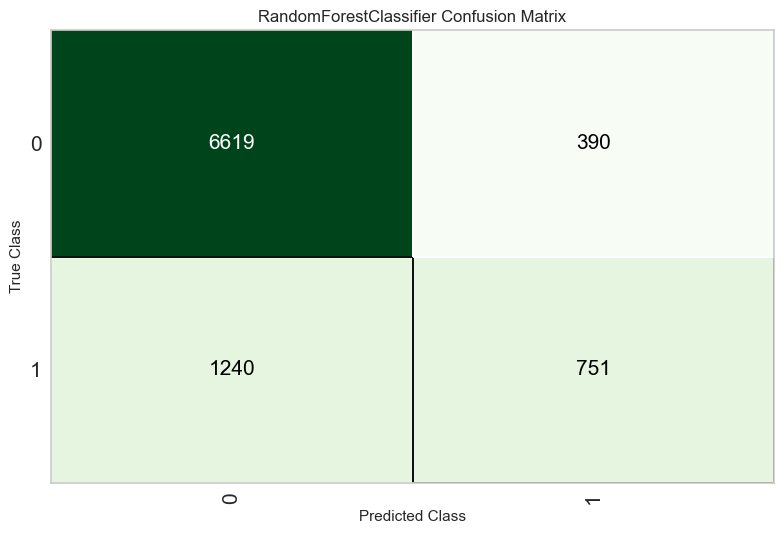

In [62]:
plot_model(tuned_rf, plot = 'confusion_matrix')

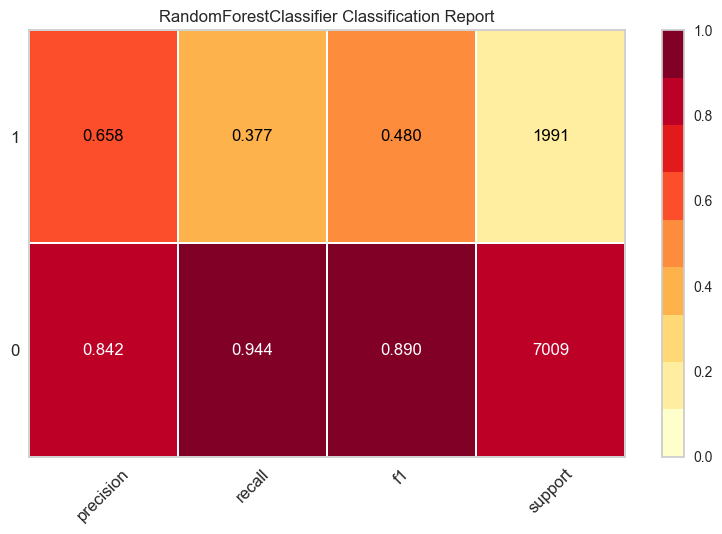

In [63]:
plot_model(tuned_rf, plot = 'class_report')

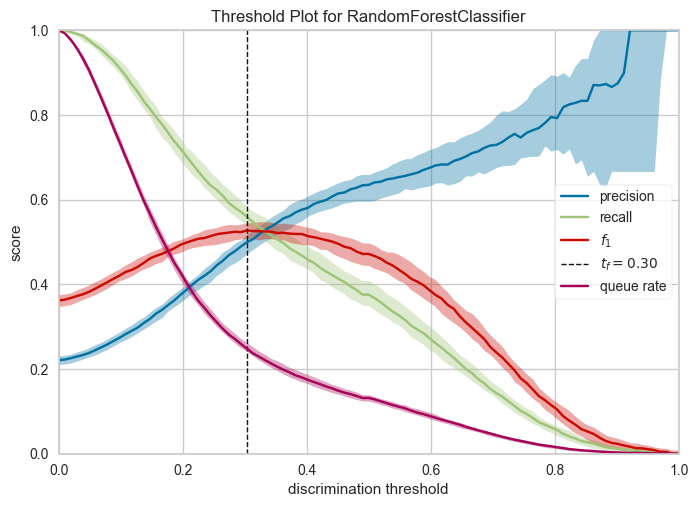

In [64]:
plot_model(tuned_rf, plot = 'threshold')

Optimal Threshold:

You see a vertical line indicating an optimal threshold value that balances different metrics. The optimal threshold is where you might get a balanced performance based on your specific problem requirements.

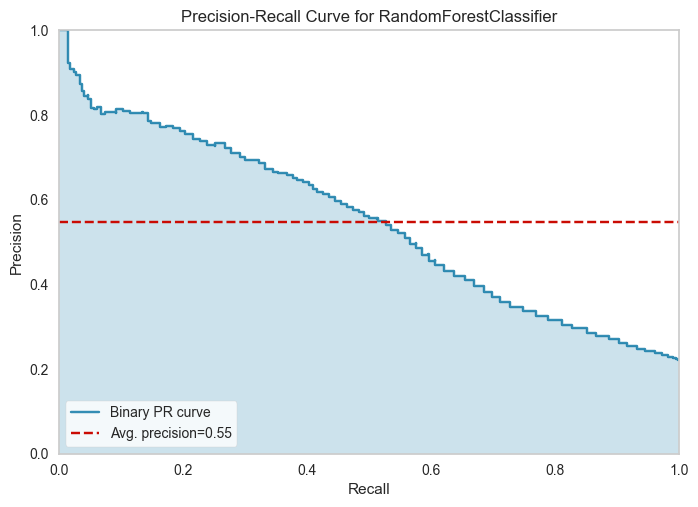

In [65]:
plot_model(tuned_rf, plot = 'pr')

The Average Precision (AP) score is a summary metric that quantifies the quality of the Precision-Recall (PR) curve. It computes the average precision value for recall value over the interval [0, 1]. The AP score provides a single number summary of the information contained in the PR curve, and it's particularly useful when you want to compare different models.

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

The PR chart is useful in such situations because it provides a way to visualize the trade-off between precision and recall for different classification thresholds. Overall, the precision-recall chart is a useful tool for evaluating the performance of binary classification models, especially in situations where the classes are imbalanced or where the cost of false positives and false negatives is different.
Here, the average precision =0.85. An AP score of 0.55 means that, on average, the model has a precision of 0.55 across all recall values.

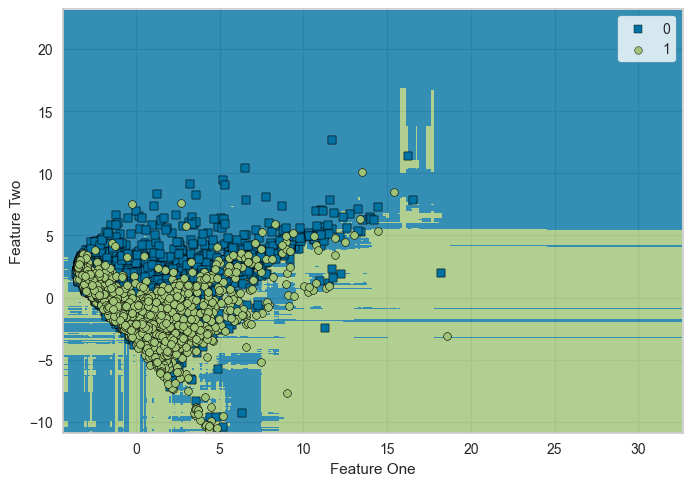

In [66]:
plot_model(tuned_rf, plot = 'boundary')

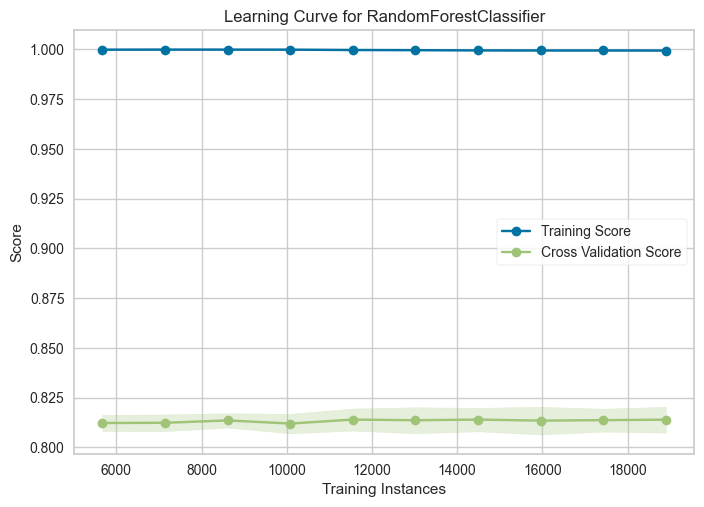

In [67]:
plot_model(rf, plot = 'learning')

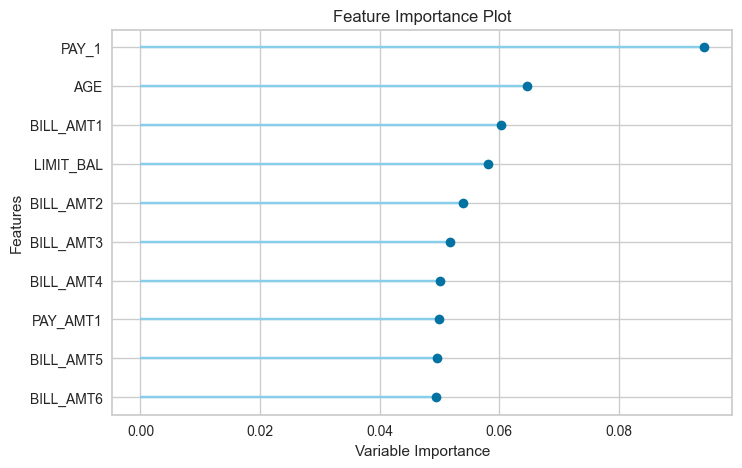

In [68]:
plot_model(tuned_rf, plot = 'feature')

###  Additional links:


1. Decision Trees with sklearn: https://scikit-learn.org/stable/modules/tree.html
2. Ensemble learning with sklearn: https://scikit-learn.org/stable/modules/ensemble.html
3. graphviz: this is used for Tree visualization: http://graphviz.org/
4. Out of Bag errors for random forest: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py